<a href="https://colab.research.google.com/github/karumanchi/project2020/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

## https://www.mlq.ai/stock-market-clustering-with-k-means/ implementation

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [16]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Navistar':'NAV',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Mistubishi':'MSBHY',
    'Sony':'SNE',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [48]:
companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [17]:
data_source = 'yahoo' # Source of data is yahoo finance.
start_date = '2015-01-01'
end_date = '2017-12-31'
df = data.DataReader(list(companies_dict.values()), data_source,start_date,end_date)

In [20]:
stock_open = np.array(df['Open']).T # stock_open is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T # stock_close is numpy array of transpose of df['Close']

company:AMZN, Change:-82.730224609375
company:AAPL, Change:16.689895629882812
company:WBA, Change:-5.6500701904296875
company:NOC, Change:75.39007568359375
company:BA, Change:102.7198486328125
company:LMT, Change:60.23992919921875
company:MCD, Change:51.34001922607422
company:INTC, Change:19.86003303527832
company:NAV, Change:-0.2399907112121582
company:IBM, Change:15.639968872070312
company:TXN, Change:29.139911651611328
company:MA, Change:24.589866638183594
company:MSFT, Change:28.760025024414062
company:GE, Change:4.653881072998047
company:AXP, Change:7.210105895996094
company:PEP, Change:38.079978942871094
company:KO, Change:12.15997314453125
company:JNJ, Change:31.659950256347656
company:TM, Change:-17.310104370117188
company:HMC, Change:-8.060001373291016
company:MSBHY, Change:30.540021896362305
company:SNE, Change:-0.25998878479003906
company:XOM, Change:9.899986267089844
company:CVX, Change:26.569992065429688
company:VLO, Change:29.45999526977539
company:F, Change:-5.5499963760

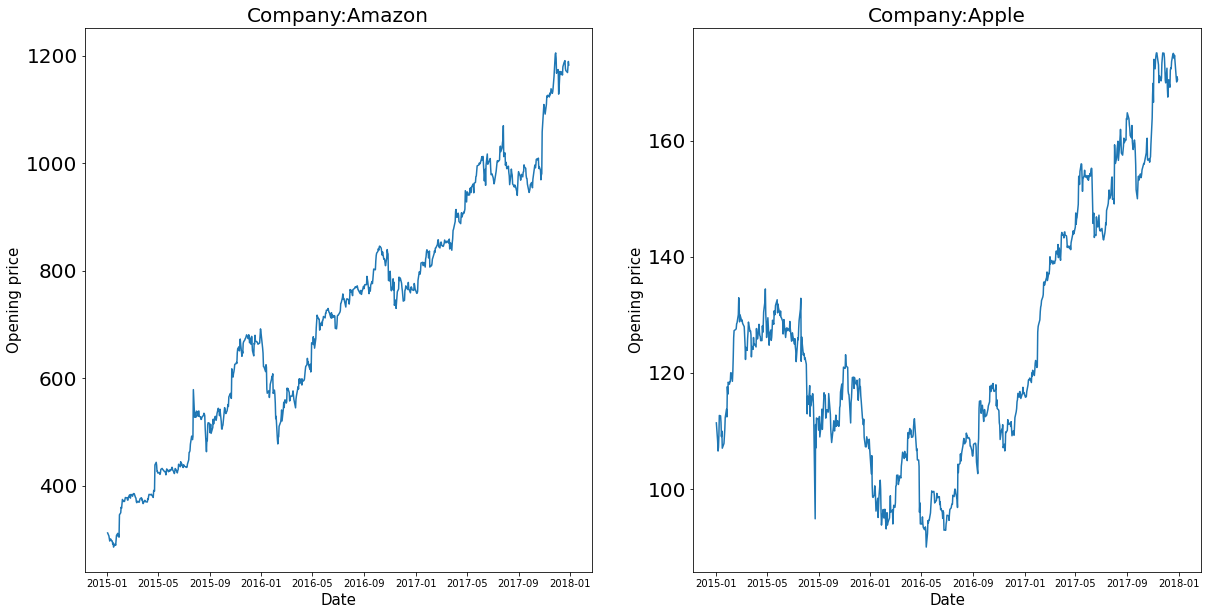

In [25]:
movements = stock_close - stock_open
sum_of_movement = np.sum(movements,1)
for i in range(len(companies_dict)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

plt.figure(figsize = (20,10)) 
plt.subplot(1,2,1) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AMZN'])
plt.subplot(1,2,2) 
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Opening price',fontsize = 15)
plt.plot(df['Open']['AAPL'])




In [51]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())


0.2604577827945872
-0.25991072682969973
0.0010453709828151102


In [45]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

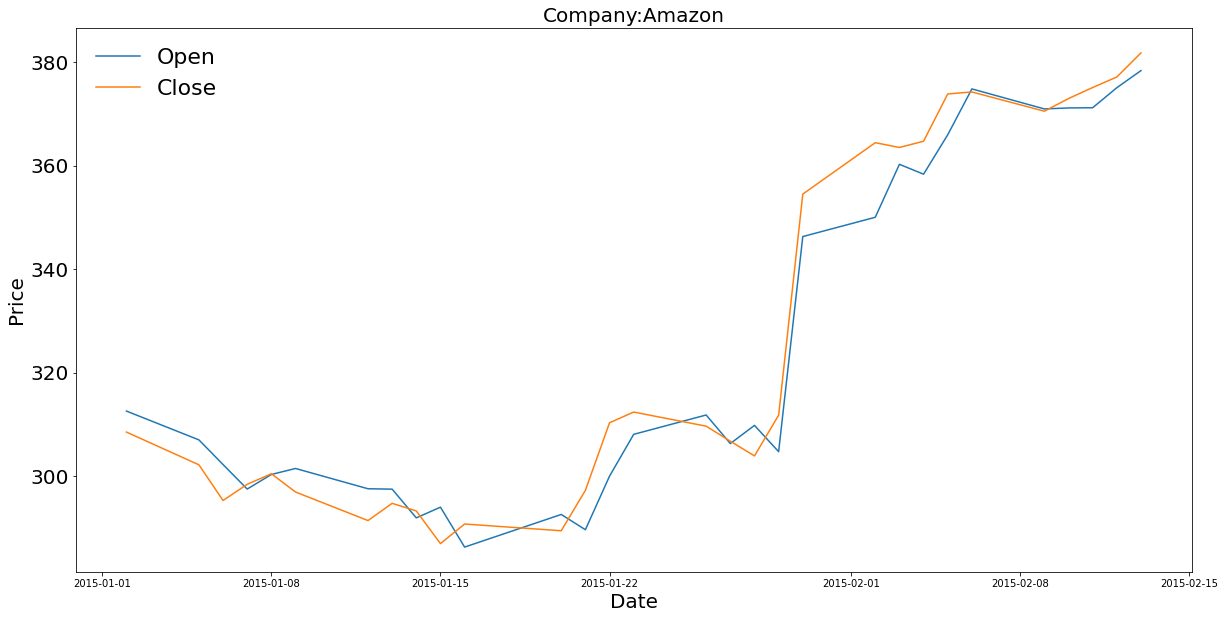

In [28]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(df.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

In [46]:
# fit pipeline to daily stock movements
pipeline.fit(movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

In [49]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                 companies
1        0            (Amazon, AMZN)
7        0   (General Electrics, GE)
9        0                (IBM, IBM)
10       0             (Intel, INTC)
13       1    (Lockheed Martin, LMT)
2        1   (American Express, AXP)
19       1   (Northrop Grumman, NOC)
25       1           (Walgreen, WBA)
21       1               (Sony, SNE)
24       1      (Valero Energy, VLO)
18       1           (Navistar, NAV)
17       2         (Microsoft, MSFT)
22       3              (Toyota, TM)
23       3  (Texas Instruments, TXN)
5        4            (Chevron, CVX)
4        4    (Bank of America, BAC)
3        4              (Boeing, BA)
0        5             (Apple, AAPL)
12       5           (Coca Cola, KO)
11       5  (Johnson & Johnson, JNJ)
6        5                 (Ford, F)
15       6          (McDonalds, MCD)
16       6       (Mistubishi, MSBHY)
20       7              (Pepsi, PEP)
8        8              (Honda, HMC)
14       9          (MasterCard, MA)
2

In [52]:
# PCA
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data
kmeans = KMeans(n_clusters=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                 companies
26       0              (Exxon, XOM)
8        0              (Honda, HMC)
25       0           (Walgreen, WBA)
21       1               (Sony, SNE)
7        1   (General Electrics, GE)
17       2         (Microsoft, MSFT)
3        2              (Boeing, BA)
16       2       (Mistubishi, MSBHY)
5        2            (Chevron, CVX)
15       2          (McDonalds, MCD)
13       3    (Lockheed Martin, LMT)
11       4  (Johnson & Johnson, JNJ)
12       4           (Coca Cola, KO)
1        4            (Amazon, AMZN)
10       4             (Intel, INTC)
0        4             (Apple, AAPL)
14       5          (MasterCard, MA)
18       5           (Navistar, NAV)
19       5   (Northrop Grumman, NOC)
24       5      (Valero Energy, VLO)
4        6    (Bank of America, BAC)
2        6   (American Express, AXP)
22       7              (Toyota, TM)
23       7  (Texas Instruments, TXN)
6        8                 (Ford, F)
9        9                (IBM, IBM)
2

<Figure size 432x288 with 0 Axes>

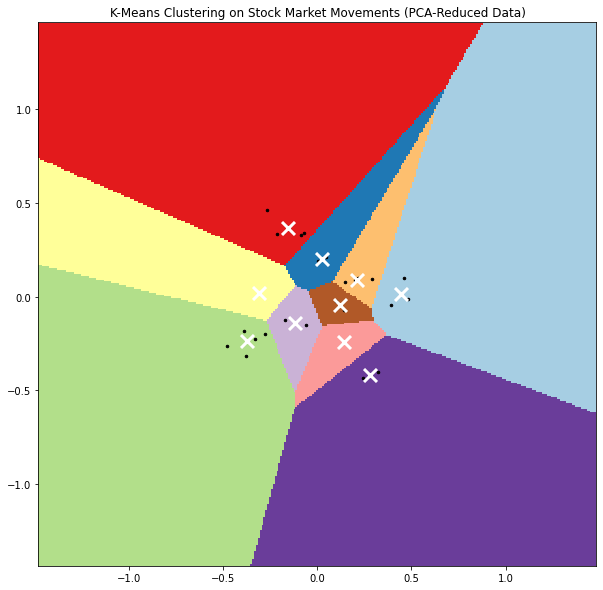

In [53]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()